# Data Science - Laboratorio 1 - Series de tiempo
## Dataset: Monthly Mean Temperature

Sofia Velasquez 22049

José Marchena 22398

### 0. Obtencion de datos

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
mean_temp = pd.read_csv(
    './data/monthly-mean-temp.csv', 
    parse_dates=['Month'], 
    index_col='Month',
    date_parser=dateparse
)
print(mean_temp.shape)


(240, 1)


C:\Users\50250\AppData\Local\Temp\ipykernel_26032\3828989619.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  mean_temp = pd.read_csv(


### 1. Analisis Exploratorio

Description
       Temperature
count   240.000000
mean     49.041250
std       8.569705
min      31.300000
25%      41.550000
50%      47.350000
75%      57.000000
max      66.500000
Frequency distribution


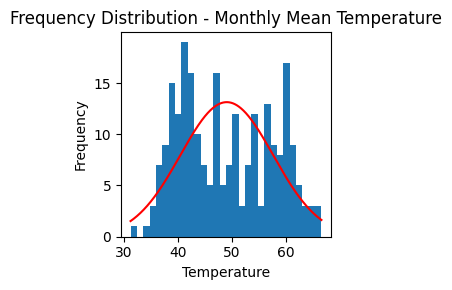

Time Series


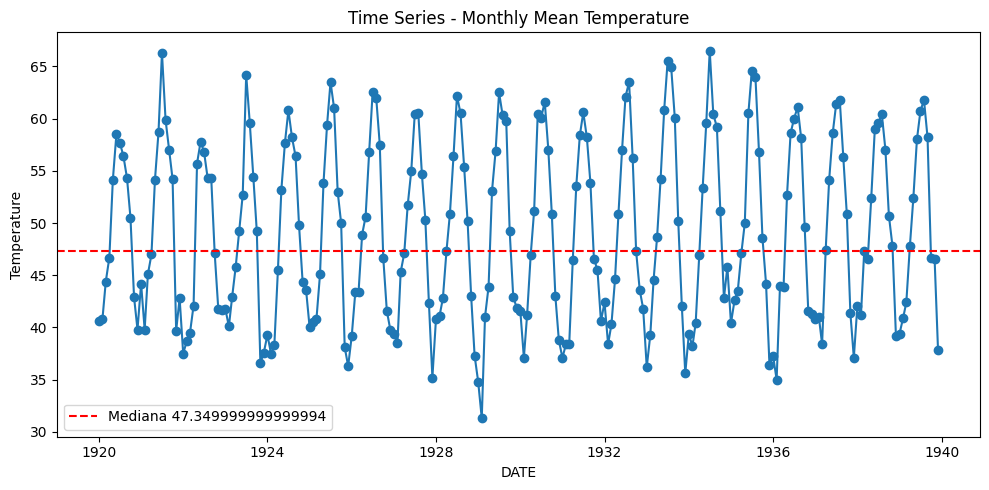

Seasonal Decompose


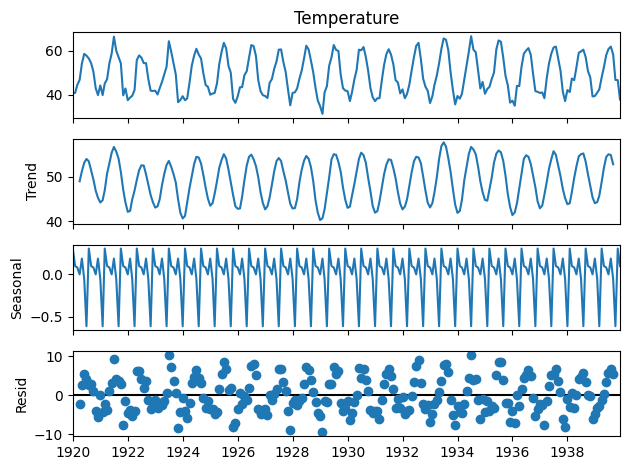

In [18]:
from scripts import analysis_graphs

value = "Temperature"
title = "Monthly Mean Temperature"

analysis_graphs(
    mean_temp,
    value,
    title
)

### 2. Moving Average

ACF plot


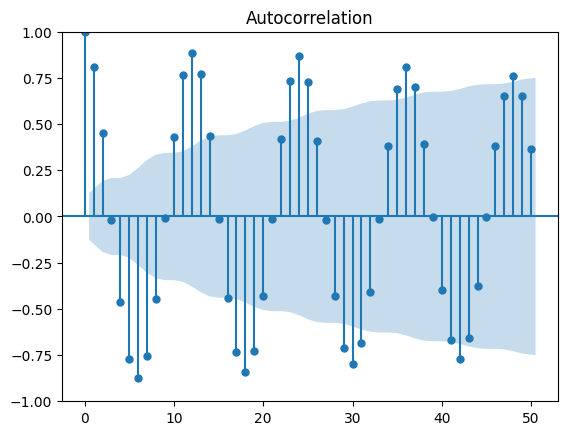

Finding Best Period
Best Lag is 11 with weight of 0.8841860709388742
Moving Average Graph


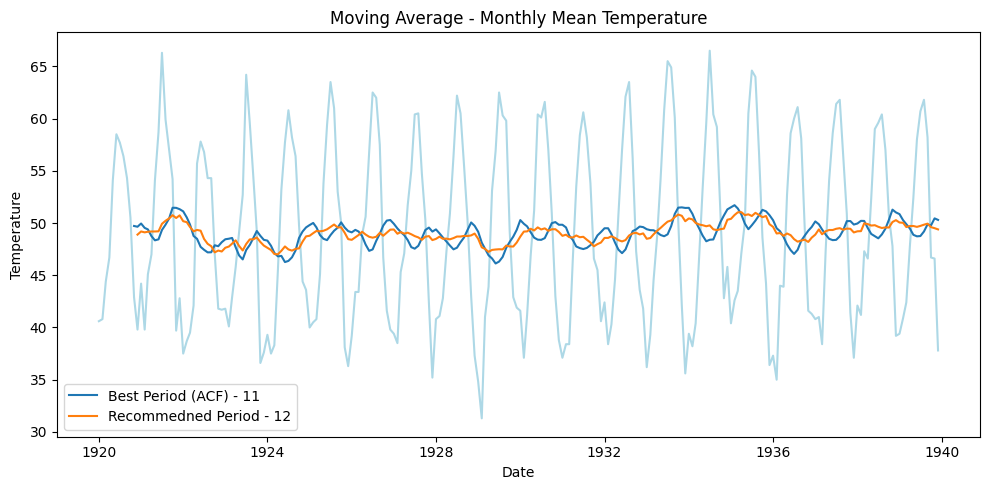

In [19]:
from scripts import moving_average

moving_average(mean_temp, value, title, 12)

### 5. Modelo SARIMA 

C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


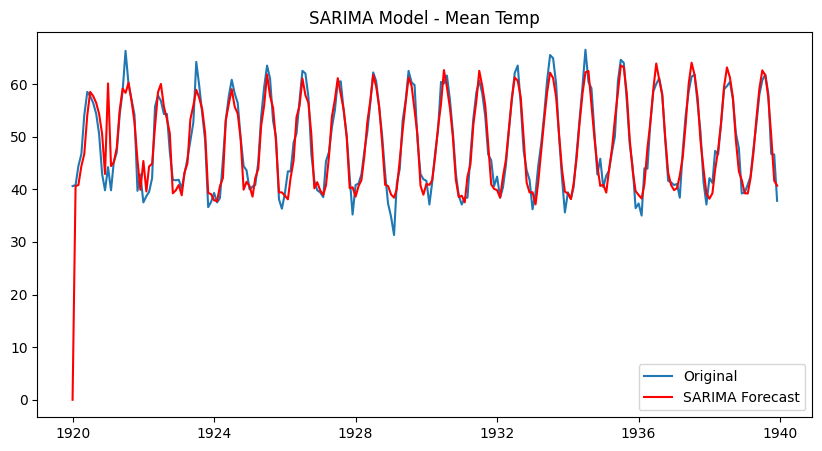

Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                        Temperature   No. Observations:                  240
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -519.766
Date:                            Fri, 18 Jul 2025   AIC                           1049.532
Time:                                    17:11:26   BIC                           1066.657
Sample:                                01-01-1920   HQIC                          1056.442
                                     - 12-01-1939                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2595      0.070      3.733      0.000       0.123       0.396
ma.L1         -0.974

In [31]:
from scripts import sarima_model

# Aplicar el modelo SARIMA
sarima_model(mean_temp.copy(), 'Month', 'Temperature', order=(1,1,1), seasonal_order=(1,1,1,12), title="Mean Temp")


*Parámetros: (1,1,1)(1,1,1,12)*

- Usé m=12 porque son temperaturas mensuales y tienen un ciclo anual.


### 6. Modelar serie de tiempo con Prophet

In [35]:
# !pip install plotly
# !pip install prophet

17:27:07 - cmdstanpy - INFO - Chain [1] start processing
17:27:08 - cmdstanpy - INFO - Chain [1] done processing


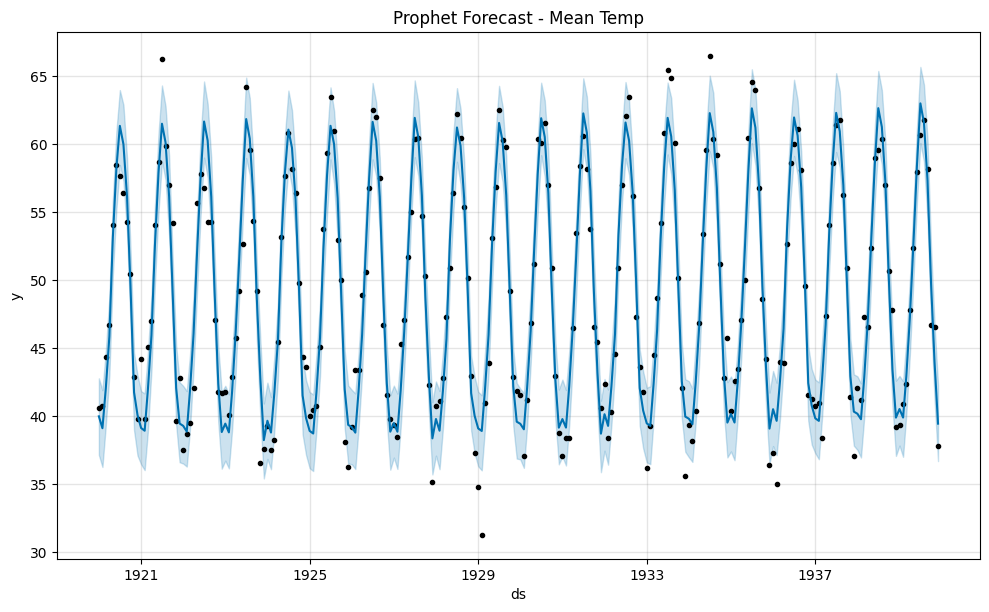

Mean Temp - Prophet MSE: 4.78, MAE: 1.70


In [34]:
from scripts import apply_prophet

# Aplicar Prophet
apply_prophet(mean_temp.copy(), 'Month', 'Temperature', title="Mean Temp")

### Comparación de modelos Sarima y Prophet

In [38]:
from scripts import compare_models

# Comparar modelos SARIMA y Prophet
results = []
results.append(compare_models(mean_temp, 'Month', 'Temperature', (1,1,1), (1,1,1,12), "Mean Temp"))

# Convertir resultados en DataFrame
comparison_df = pd.DataFrame(results)
print("\n Comparación de Modelos:\n")
print(comparison_df)

C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
17:48:28 - cmdstanpy - INFO - Chain [1] start processing
17:48:28 - cmdstanpy - INFO - Chain [1] done processing



 Comparación de Modelos:

     Dataset  SARIMA_RMSE  SARIMA_MAE  Prophet_RMSE  Prophet_MAE Best_Model
0  Mean Temp         3.78        2.21          2.19          1.7    Prophet
